Now that we've scraped the metadata of all of the Harry Potter fan fictions, it's time to explore!

# Import Data as DataFrame
We'll import as JSON and convert to a Pandas dataframe for easier manipulation/visualization.

In [1]:
import pandas as pd

data_directory = '../data/'

# here is the corrected data
filename = "corrected_data.json"

# take the transpose so that the column names are the metadata keys, not the story ids
df = pd.read_json(data_directory + filename).transpose()

# let's see what it looks like!
df.head()

,author_id,characters,genres,language,num_chapters,num_favs,num_follows,num_reviews,num_words,published,rated,status,title,updated
10000036,2846408,"[[Ron W., Hermione G.]]","[Romance, Humor]",English,1,5,2,3,5436,1389050085,T,Complete,Kilts and other adversities,1389050085
10000109,5232542,"[James P., Lily Evans P.]","[Humor, Romance]",English,1,4,NaN,2,747,1389051817,K+,Complete,Of Dead Puppies and Dropped Pianos,1389051817
10000111,5438139,[],[],Spanish,1,7,6,5,400,1389051884,K+,Incomplete,Querido primo Harry,1389051884
10000114,5437478,"[Hermione G., Draco M.]","[Romance, Humor]",Spanish,1,11,13,8,1757,1389051911,K+,Incomplete,Conciertos en Hogwarts,1389051911
10000137,4626918,"[Bellatrix L., Luna L.]","[Humor, Horror]",English,3,NaN,NaN,3,659,1389052244,T,Complete,Crazy songs from crazy people,1389414254


In [2]:
# for the purposes of development, let's only look at the first 1000 entries. run this cell for faster development
dev = df.head(n=1000).copy()

In [50]:
# run this cell for the real data
dev = df.copy()

In [28]:
# should put this in a util class later
import datetime
def convertToDateString(timestamp):
    return datetime.datetime.utcfromtimestamp(int(timestamp)).strftime('%Y-%m-%d')

def convertToDateWithTimeString(timestamp):
    return datetime.datetime.utcfromtimestamp(int(timestamp)).strftime('%Y-%m-%d %H:%M:%S')

def convertToDateTimeObj(timestamp):
    return datetime.datetime.utcfromtimestamp(timestamp)


In [52]:
def addPublishedDate(dataframe):
    dataframe['published_date'] = dataframe['published'].map(lambda x: convertToDateTimeObj(x).date())
    return dataframe

addPublishedDate(dev)
dev.head()

,author_id,characters,genres,language,num_chapters,num_favs,num_follows,num_reviews,num_words,published,rated,status,title,updated,published_date
10000036,2846408,"[[Ron W., Hermione G.]]","[Romance, Humor]",English,1,5,2,3,5436,1389050085,T,Complete,Kilts and other adversities,1389050085,2014-01-06
10000109,5232542,"[James P., Lily Evans P.]","[Humor, Romance]",English,1,4,NaN,2,747,1389051817,K+,Complete,Of Dead Puppies and Dropped Pianos,1389051817,2014-01-06
10000111,5438139,[],[],Spanish,1,7,6,5,400,1389051884,K+,Incomplete,Querido primo Harry,1389051884,2014-01-06
10000114,5437478,"[Hermione G., Draco M.]","[Romance, Humor]",Spanish,1,11,13,8,1757,1389051911,K+,Incomplete,Conciertos en Hogwarts,1389051911,2014-01-06
10000137,4626918,"[Bellatrix L., Luna L.]","[Humor, Horror]",English,3,NaN,NaN,3,659,1389052244,T,Complete,Crazy songs from crazy people,1389414254,2014-01-06


In [67]:
min_year = datetime.datetime.strptime("1999-01-01", '%Y-%m-%d')
max_year = datetime.datetime.strptime("2017-07-31", '%Y-%m-%d')

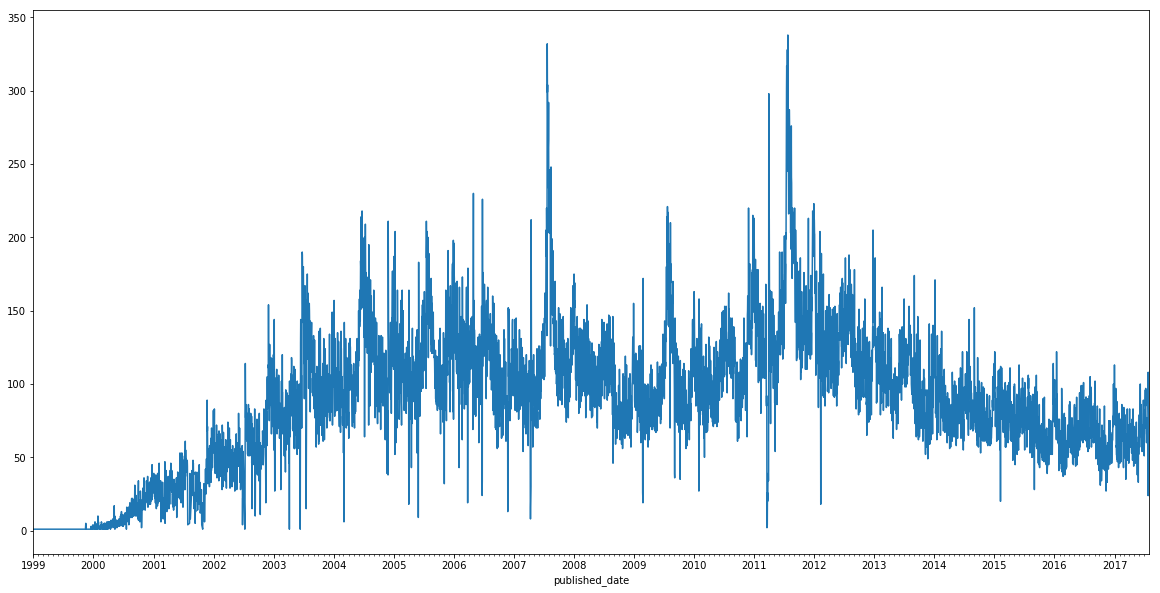

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (20,10)

# took the x axis tick labeling from https://matplotlib.org/devdocs/gallery/api/date.html
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# group by published date and count number of fanfics
published_grouped = dev.groupby('published_date').published_date.count()

# plot!
ax = published_grouped.plot()

years.tick_values(min_year, max_year)
# format
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim(min_year, max_year)

fig = plt.figure()
fig.autofmt_xdate()

Man, I bet I know what that first spike is. 2007, middle of it, hand me down clothes and a redhead? Must be the day Harry Potter and the Deathly Hallows came out. And that second spike? Middle of 2011- that's gotta be when the last movie came out. 

In [101]:
%matplotlib inline

last_book = datetime.datetime.strptime("2007-07-21","%Y-%m-%d")
last_movie = datetime.datetime.strptime("2011-07-11", "%Y-%m-%d")

ax.axvline(x=last_book, color='r')
ax.axvline(x=last_movie, color='r')

fig

Not sure why that cell doesn't display the figure inline... Or why the settings aren't getting carried over. Should look into that later. For now let's just redraw the plot and add in the labels for when the last book and the last movie came out.

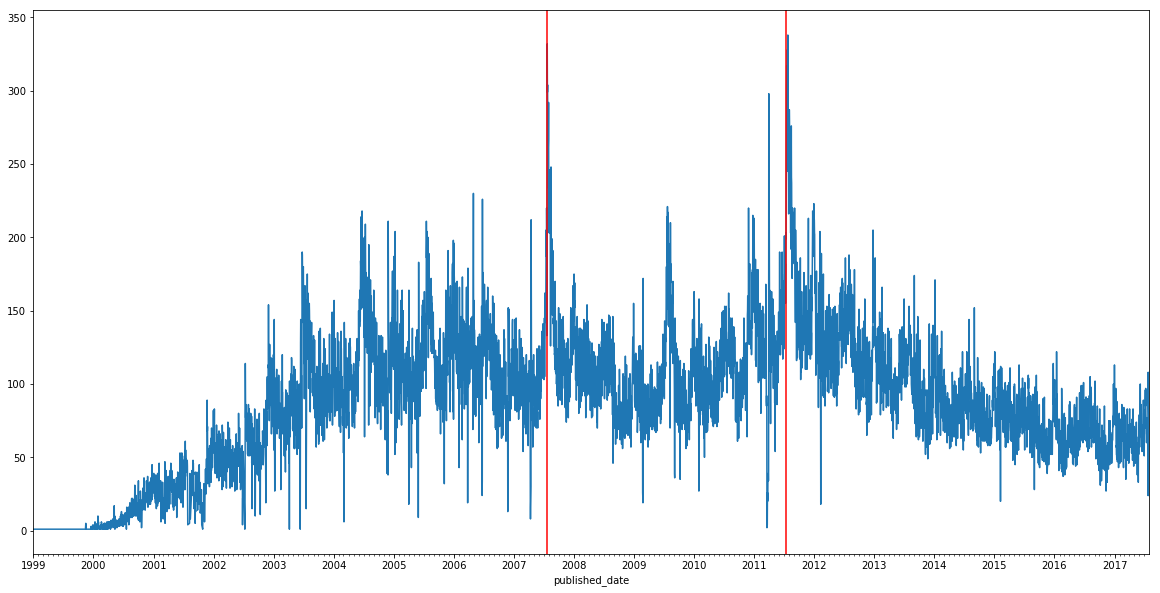

In [103]:
plt.rcParams['figure.figsize'] = (20,10)

# took the x axis tick labeling from https://matplotlib.org/devdocs/gallery/api/date.html
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# group by published date and count number of fanfics
published_grouped = dev.groupby('published_date').published_date.count()

# plot!
ax = published_grouped.plot()

years.tick_values(min_year, max_year)
# format
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim(min_year, max_year)

# add some markers
ax.axvline(x=last_book, color='r')
ax.axvline(x=last_movie, color='r')

fig = plt.figure()
fig.autofmt_xdate()

Spot on! 10 points to me!